## Using Text Classification to Predict Stock Market Sentiment

In [93]:
import pandas as pd

### Prepare Data

In [96]:
cnbc_df = pd.read_csv('./data/cnbc_data_truncated.csv')
cnbc_df

,Date,Summary
0,2024-06-03,All three major averages wrapped up a solid mo...
1,2024-06-04,Paramount and Skydance have agreed to terms of...
2,2024-06-05,Elon Musk ordered Nvidia to send thousands of ...
3,2024-06-06,The S&P 500 and the Nasdaq Composite hit new r...
4,2024-06-07,The indexes closed with little movement Thursd...
...,...,...
101,2024-10-25,A federal judge has blocked the proposed merge...
102,2024-10-28,"Futures are trading higher Monday morning, led..."
103,2024-10-29,JPMorgan Chase filed lawsuits against customer...
104,2024-10-30,Alphabet reported third-quarter earnings resul...


In [98]:
stock_df = pd.read_csv('./data/stock_data_truncated.csv')
stock_df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2024-10-31,5775.34,5775.34,5702.86,5705.45,5705.45,4425660000
1,1,2024-10-30,5832.65,5850.94,5811.28,5813.67,5813.67,3851120000
2,2,2024-10-29,5819.68,5847.19,5802.17,5832.92,5832.92,3879100000
3,3,2024-10-28,5833.93,5842.92,5823.08,5823.52,5823.52,3691280000
4,4,2024-10-25,5826.75,5862.82,5799.98,5808.12,5808.12,3501280000
...,...,...,...,...,...,...,...,...
101,101,2024-06-07,5343.81,5375.08,5331.33,5346.99,5346.99,3692760000
102,102,2024-06-06,5357.80,5362.35,5335.36,5352.96,5352.96,3609990000
103,103,2024-06-05,5314.48,5354.16,5297.64,5354.03,5354.03,3591460000
104,104,2024-06-04,5278.24,5298.80,5257.63,5291.34,5291.34,3707900000


In [100]:
merged_df = pd.merge(cnbc_df, stock_df, on="Date", how="inner")
merged_df.head()

,Date,Summary,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
0,2024-06-03,All three major averages wrapped up a solid mo...,105,5297.15,5302.11,5234.32,5283.40,5283.40,4046920000
1,2024-06-04,Paramount and Skydance have agreed to terms of...,104,5278.24,5298.80,5257.63,5291.34,5291.34,3707900000
2,2024-06-05,Elon Musk ordered Nvidia to send thousands of ...,103,5314.48,5354.16,5297.64,5354.03,5354.03,3591460000
3,2024-06-06,The S&P 500 and the Nasdaq Composite hit new r...,102,5357.80,5362.35,5335.36,5352.96,5352.96,3609990000
4,2024-06-07,The indexes closed with little movement Thursd...,101,5343.81,5375.08,5331.33,5346.99,5346.99,3692760000


In [102]:
merged_df['PctChg'] = merged_df['Close'].pct_change() * 100
merged_df = merged_df.dropna(subset=['PctChg']).reset_index(drop=True)
merged_df.head()

,Date,Summary,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,PctChg
0,2024-06-04,Paramount and Skydance have agreed to terms of...,104,5278.24,5298.80,5257.63,5291.34,5291.34,3707900000,0.150282
1,2024-06-05,Elon Musk ordered Nvidia to send thousands of ...,103,5314.48,5354.16,5297.64,5354.03,5354.03,3591460000,1.184766
2,2024-06-06,The S&P 500 and the Nasdaq Composite hit new r...,102,5357.80,5362.35,5335.36,5352.96,5352.96,3609990000,-0.019985
3,2024-06-07,The indexes closed with little movement Thursd...,101,5343.81,5375.08,5331.33,5346.99,5346.99,3692760000,-0.111527
4,2024-06-10,Stock futures slipped Monday morning after pol...,100,5341.22,5365.79,5331.52,5360.79,5360.79,3622280000,0.258089


In [104]:
merged_df['Label'] = (merged_df['PctChg'] >= 0).astype(int)
merged_df.head()

,Date,Summary,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,PctChg,Label
0,2024-06-04,Paramount and Skydance have agreed to terms of...,104,5278.24,5298.80,5257.63,5291.34,5291.34,3707900000,0.150282,1
1,2024-06-05,Elon Musk ordered Nvidia to send thousands of ...,103,5314.48,5354.16,5297.64,5354.03,5354.03,3591460000,1.184766,1
2,2024-06-06,The S&P 500 and the Nasdaq Composite hit new r...,102,5357.80,5362.35,5335.36,5352.96,5352.96,3609990000,-0.019985,0
3,2024-06-07,The indexes closed with little movement Thursd...,101,5343.81,5375.08,5331.33,5346.99,5346.99,3692760000,-0.111527,0
4,2024-06-10,Stock futures slipped Monday morning after pol...,100,5341.22,5365.79,5331.52,5360.79,5360.79,3622280000,0.258089,1


### Establish Baseline

In [107]:
label_counts = merged_df['Label'].value_counts()
print(label_counts)

Label
1    61
0    44
Name: count, dtype: int64


In [109]:
#The baseline is calculated by simply guessing the majority outcome.
baseline = 61/105
baseline

0.580952380952381

### Experiment with models and hyperparameters

In [112]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [114]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text using lemmatizing
def preprocess_with_lemmatizing(text):
    tokens = nltk.word_tokenize(text.lower())
    return " ".join([lemmatizer.lemmatize(word) for word in tokens if word.isalnum()])

# Apply preprocessing
merged_df['Summary_Lemmatized'] = merged_df['Summary'].apply(preprocess_with_lemmatizing)

[nltk_data] Downloading package punkt to /Users/odeanmaye/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/odeanmaye/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/odeanmaye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
# Split data into train and test sets
X_lemmatized = merged_df['Summary_Lemmatized']
y = merged_df['Label']

X_lem_train, X_lem_test, y_lem_train, y_lem_test = train_test_split(X_lemmatized, y, test_size=0.25, random_state=42)

In [118]:
# Define vectorizers
vectorizers = {
    "CountVectorizer": CountVectorizer(stop_words='english', max_features=500),
    "TfidfVectorizer": TfidfVectorizer(stop_words='english', max_features=500)
}

# Define classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "MultinomialNB": MultinomialNB()
}

# Function to build pipelines and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    for vec_name, vectorizer in vectorizers.items():
        for clf_name, clf in classifiers.items():
            # Create pipeline
            pipeline = Pipeline([
                (vec_name, vectorizer),
                (clf_name, clf)
            ])
            
            # Use GridSearchCV to find the best parameters
            grid = GridSearchCV(pipeline, param_grid={}, cv=3, scoring='accuracy')
            grid.fit(X_train, y_train)
            
            # Evaluate the model
            y_pred = grid.predict(X_test)
            accuracy = grid.best_score_
            results.append({
                "Preprocessing": vec_name,
                "Classifier": clf_name,
                "Best Parameters": grid.best_params_,
                "Accuracy": accuracy,
                "Report": classification_report(y_test, y_pred)
            })
    return results

In [120]:
# Evaluate models with lemmatizing
results_lemmatizing = evaluate_models(X_lem_train, X_lem_test, y_lem_train, y_lem_test)

In [122]:
# Combine results into a DataFrame
final_results = pd.DataFrame(results_lemmatizing)

# Combine Preprocessing and Classifier into a single label
final_results['Combined'] = final_results['Preprocessing'] + ' - ' + final_results['Classifier']

final_results

,Preprocessing,Classifier,Best Parameters,Accuracy,Report,Combined
0,CountVectorizer,LogisticRegression,{},0.641026,precision recall f1-score ...,CountVectorizer - LogisticRegression
1,CountVectorizer,DecisionTreeClassifier,{},0.679487,precision recall f1-score ...,CountVectorizer - DecisionTreeClassifier
2,CountVectorizer,MultinomialNB,{},0.538462,precision recall f1-score ...,CountVectorizer - MultinomialNB
3,TfidfVectorizer,LogisticRegression,{},0.641026,precision recall f1-score ...,TfidfVectorizer - LogisticRegression
4,TfidfVectorizer,DecisionTreeClassifier,{},0.589744,precision recall f1-score ...,TfidfVectorizer - DecisionTreeClassifier
5,TfidfVectorizer,MultinomialNB,{},0.679487,precision recall f1-score ...,TfidfVectorizer - MultinomialNB


In [124]:
import matplotlib.pyplot as plt

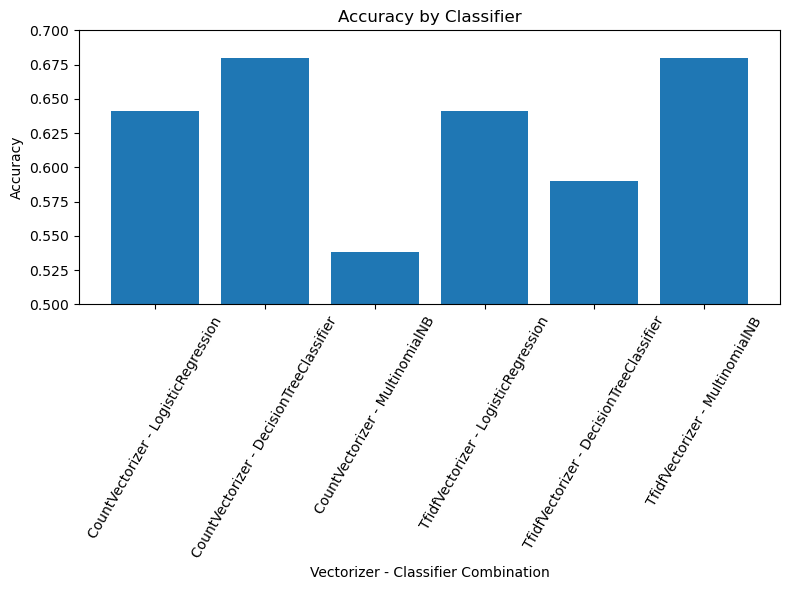

In [126]:
# Plot
plt.figure(figsize=(8, 6))
plt.bar(final_results['Combined'], final_results['Accuracy'])
plt.title('Accuracy by Classifier')
plt.ylabel('Accuracy')
plt.xlabel('Vectorizer - Classifier Combination')
plt.xticks(rotation=60)
plt.ylim(0.5, 0.7)
plt.tight_layout()
plt.savefig('accuracy_by_classifier.png')
plt.show()

In [91]:
# Display the best results
best_results = final_results.loc[final_results['Accuracy'].idxmax()]
print(best_results)

Preprocessing                                        CountVectorizer
Classifier                                    DecisionTreeClassifier
Best Parameters                                                   {}
Accuracy                                                    0.692308
Report                           precision    recall  f1-score   ...
Combined                    CountVectorizer - DecisionTreeClassifier
Name: 1, dtype: object


### Tune the best performing models

In [48]:
param_grid = {
    "MultinomialNB__alpha": [0.1, 0.5, 1.0, 2.0],
    "MultinomialNB__fit_prior": [True, False]
}

# Function to evaluate MultinomialNB with tuned parameters
def tune_multinomialnb(X_train, X_test, y_train, y_test):
    results = []
    # Create pipeline
    pipeline = Pipeline([
        ("TfidfVectorizer", TfidfVectorizer(stop_words='english', max_features=500)),
        ("MultinomialNB", MultinomialNB())
    ])
    
    # Use GridSearchCV to tune hyperparameters
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    # Evaluate the best model
    y_pred = grid.best_estimator_.predict(X_test)
    accuracy = grid.best_score_
    results.append({
        "Preprocessing": "TfidfVectorizer",
        "Best Parameters": grid.best_params_,
        "Accuracy": accuracy,
        "Report": classification_report(y_test, y_pred, output_dict=True)
    })
        
    return results

In [50]:
# Assuming you have train-test split data
results = tune_multinomialnb(X_lem_train, X_lem_test, y_lem_train, y_lem_test)

# Print the best results
for res in results:
    print(f"Vectorizer: {res['Preprocessing']}")
    print(f"Best Parameters: {res['Best Parameters']}")
    print(f"Accuracy: {res['Accuracy']}")
    print(f"Classification Report: {res['Report']}")

Vectorizer: TfidfVectorizer
Best Parameters: {'MultinomialNB__alpha': 0.5, 'MultinomialNB__fit_prior': True}
Accuracy: 0.7041666666666666
Classification Report: {'0': {'precision': 0.6666666666666666, 'recall': 0.14285714285714285, 'f1-score': 0.23529411764705882, 'support': 14.0}, '1': {'precision': 0.5, 'recall': 0.9230769230769231, 'f1-score': 0.6486486486486487, 'support': 13.0}, 'accuracy': 0.5185185185185185, 'macro avg': {'precision': 0.5833333333333333, 'recall': 0.532967032967033, 'f1-score': 0.4419713831478538, 'support': 27.0}, 'weighted avg': {'precision': 0.5864197530864197, 'recall': 0.5185185185185185, 'f1-score': 0.4343166696107873, 'support': 27.0}}
